In [5]:
import pandas as pd
import requests
import re
import datetime
from datetime import timedelta
import time
import numpy as np
from scipy.stats import norm
import math
from matplotlib import pyplot as plt
from datetime import timedelta
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from tensorflow.keras.layers import Dense, Dropout
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import layers
from tensorflow.keras.layers import Dense, Dropout
import statsmodels.formula.api as smf 

In [6]:
data_df = pd.read_csv('final_df_processed_2.csv')
data_df.head()

Unnamed: 0  property_id  sale_price  building_year_built  zip_code  \
0        5963   8323008024      167000               1946.0     91767   
1        5964   8318018031      263000               1964.0     91767   
2        5965   8366006010      176001               1952.0     91767   
3        5966   8317037029      248000               1991.0     91767   
4        5967   8323011020      184001               1948.0     91767   

                              Address_Google  closest_zip_1  distance_1  \
0  629 WASHINGTON AVE, POMONA, CA 91767, USA          91711        2.12   
1    1796 MARTELLO ST, POMONA, CA 91767, USA          91711        2.12   
2     2832 SUMNER AVE, POMONA, CA 91767, USA          91711        2.12   
3  816 AMBER OAKS CIR, POMONA, CA 91767, USA          91711        2.12   
4     631 LORANNE AVE, POMONA, CA 91767, USA          91711        2.12   

   closest_zip_2  distance_2  ...  Unemployment Rate_3   sale_price_1  \
0          91768        2.48  ...                 14.4  214112.037037   
1          91768        2.48  ...                 14.4  214112.037037   
2          91768        2.48  ...                 14.4  214112.037037   
3          91768        2.48  ...                 14.4  214112.037037   
4          91768        2.48  ...                 14.4  214112.037037   

    sale_price_2   sale_price_3  California AGI_1  California AGI_2  \
0  232170.622642  216516.030303       631533333.0       631533333.0   
1  232170.622642  216516.030303       631533333.0       631533333.0   
2  232170.622642  216516.030303       631533333.0       631533333.0   
3  232170.622642  216516.030303       631533333.0       631533333.0   
4  232170.622642  216516.030303       631533333.0       631533333.0   

  California AGI_3  Labor Force_1  Labor Force_2 Labor Force_3  
0      631533333.0        66900.0        67000.0       66500.0  
1      631533333.0        66900.0        67000.0       66500.0  
2      631533333.0        66900.0        67000.0       66500.0  
3      631533333.0        66900.0        67000.0       66500.0  
4      631533333.0        66900.0        67000.0       66500.0  

[5 rows x 71 columns]

In [7]:
len(data_df)

692035

In [8]:
len(data_df.loc[data_df["Year"] >= 2017])

249205

In [9]:
zip_df = data_df.loc[data_df['zip_code'] == 93535]
zip_df

Unnamed: 0  property_id  sale_price  building_year_built  zip_code  \
4040        10410   3126007024      140000               2007.0     93535   
4041        10411   3147014015      105001               1972.0     93535   
4042        10412   3170063016      214002               2010.0     93535   
4043        10413   3170063017      213502               2009.0     93535   
4044        10414   3150065046      185001               2006.0     93535   
...           ...          ...         ...                  ...       ...   
15490       21860   3162010029      345003               1956.0     93535   
15491       21861   3070006008      325003               1987.0     93535   
15492       21862   3176031036      566005               2019.0     93535   
15493       21863   3170040083      435004               2004.0     93535   
15494       21864   3069013006      243502               1985.0     93535   

                                          Address_Google  closest_zip_1  \
4040            43442 5TH ST E, LANCASTER, CA 93535, USA          93534   
4041           44633 BENALD ST, LANCASTER, CA 93535, USA          93534   
4042            43048 DARBY ST, LANCASTER, CA 93535, USA          93534   
4043            43042 DARBY ST, LANCASTER, CA 93535, USA          93534   
4044         2835 E EMERALD LN, LANCASTER, CA 93535, USA          93534   
...                                                  ...            ...   
15490       17110 E AVENUE K12, LANCASTER, CA 93535, USA          93534   
15491  41028 168TH ST E, LAKE LOS ANGELES, CA 93535, USA          93534   
15492        1748 E HOLGUIN ST, LANCASTER, CA 93535, USA          93534   
15493        1034 E AVENUE K11, LANCASTER, CA 93535, USA          93534   
15494  15622 VALEPORT AVE, LAKE LOS ANGELES, CA 93535...          93534   

       distance_1  closest_zip_2  distance_2  ...  Unemployment Rate_3  \
4040         2.22          93536        5.13  ...                 14.5   
4041         2.22          93536        5.13  ...                 14.5   
4042         2.22          93536        5.13  ...                 14.5   
4043         2.22          93536        5.13  ...                 14.5   
4044         2.22          93536        5.13  ...                 14.5   
...           ...            ...         ...  ...                  ...   
15490        2.22          93536        5.13  ...                 12.7   
15491        2.22          93536        5.13  ...                 12.7   
15492        2.22          93536        5.13  ...                 12.7   
15493        2.22          93536        5.13  ...                 12.7   
15494        2.22          93536        5.13  ...                 12.7   

       sale_price_1   sale_price_2   sale_price_3  California AGI_1  \
4040   120529.42029  120721.175325  125930.913043      8.208905e+08   
4041   120529.42029  120721.175325  125930.913043      8.208905e+08   
4042   120529.42029  120721.175325  125930.913043      8.208905e+08   
4043   120529.42029  120721.175325  125930.913043      8.208905e+08   
4044   120529.42029  120721.175325  125930.913043      8.208905e+08   
...             ...            ...            ...               ...   
15490  396951.43750  394732.929412  379704.360825      1.193411e+09   
15491  396951.43750  394732.929412  379704.360825      1.193411e+09   
15492  396951.43750  394732.929412  379704.360825      1.193411e+09   
15493  396951.43750  394732.929412  379704.360825      1.193411e+09   
15494  396951.43750  394732.929412  379704.360825      1.193411e+09   

       California AGI_2 California AGI_3  Labor Force_1  Labor Force_2  \
4040       8.208905e+08     8.208905e+08        63300.0        63400.0   
4041       8.208905e+08     8.208905e+08        63300.0        63400.0   
4042       8.208905e+08     8.208905e+08        63300.0        63400.0   
4043       8.208905e+08     8.208905e+08        63300.0        63400.0   
4044       8.208905e+08     8.208905e+08        63300.0        63400.

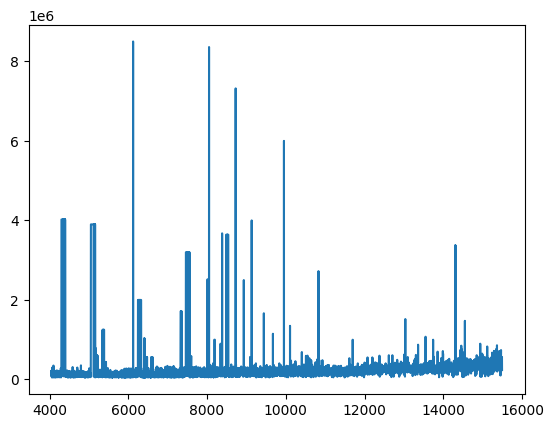

In [10]:
plt.plot(zip_df.index, zip_df['sale_price'])

In [11]:
zip_df['sale_price_Prev'] = zip_df['sale_price'].shift(1)
zip_df['change_sale_price'] = zip_df['sale_price'] - zip_df['sale_price_Prev']


mod1 = smf.ols(f'change_sale_price ~ sale_price_Prev', data = zip_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:      change_sale_price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     943.9
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          3.06e-199
Time:                        23:04:04   Log-Likelihood:            -1.6217e+05
No. Observations:               11454   AIC:                         3.244e+05
Df Residuals:                   11452   BIC:                         3.244e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.044e+04   3584.721     

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_34054/2461574441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['sale_price_Prev'] = zip_df['sale_price'].shift(1)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_34054/2461574441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['change_sale_price'] = zip_df['sale_price'] - zip_df['sale_price_Prev']


In [12]:
# Extract the t-statistic for sale_price_Prev
t_stat_sale_price_Prev = mod1.tvalues['sale_price_Prev']
print("T-stat for sale_price_Prev:", t_stat_sale_price_Prev)

T-stat for sale_price_Prev: -30.72217848710031


In [13]:
data_df['Quarter'] = data_df['Month'].apply(lambda x: 4 if x >= 9 else (3 if x >= 6 else (2 if x >= 2 else 1)))
data_df.dropna(inplace=True)
data_df.head()

Unnamed: 0  property_id  sale_price  building_year_built  zip_code  \
0        5963   8323008024      167000               1946.0     91767   
1        5964   8318018031      263000               1964.0     91767   
2        5965   8366006010      176001               1952.0     91767   
3        5966   8317037029      248000               1991.0     91767   
4        5967   8323011020      184001               1948.0     91767   

                              Address_Google  closest_zip_1  distance_1  \
0  629 WASHINGTON AVE, POMONA, CA 91767, USA          91711        2.12   
1    1796 MARTELLO ST, POMONA, CA 91767, USA          91711        2.12   
2     2832 SUMNER AVE, POMONA, CA 91767, USA          91711        2.12   
3  816 AMBER OAKS CIR, POMONA, CA 91767, USA          91711        2.12   
4     631 LORANNE AVE, POMONA, CA 91767, USA          91711        2.12   

   closest_zip_2  distance_2  ...   sale_price_1   sale_price_2  \
0          91768        2.48  ...  214112.037037  232170.622642   
1          91768        2.48  ...  214112.037037  232170.622642   
2          91768        2.48  ...  214112.037037  232170.622642   
3          91768        2.48  ...  214112.037037  232170.622642   
4          91768        2.48  ...  214112.037037  232170.622642   

    sale_price_3  California AGI_1  California AGI_2  California AGI_3  \
0  216516.030303       631533333.0       631533333.0       631533333.0   
1  216516.030303       631533333.0       631533333.0       631533333.0   
2  216516.030303       631533333.0       631533333.0       631533333.0   
3  216516.030303       631533333.0       631533333.0       631533333.0   
4  216516.030303       631533333.0       631533333.0       631533333.0   

  Labor Force_1  Labor Force_2  Labor Force_3 Quarter  
0       66900.0        67000.0        66500.0       2  
1       66900.0        67000.0        66500.0       2  
2       66900.0        67000.0        66500.0       2  
3       66900.0        67000.0        66500.0       2  
4       66900.0        67000.0        66500.0       2  

[5 rows x 72 columns]

In [14]:
data_df.sort_values(by='Date', inplace=True)

In [15]:
data_df.drop(columns=['Unnamed: 0', 'property_id', 'Address_Google', 'Month',
       'Year','Date'], inplace=True)

In [16]:
data_df = pd.get_dummies(data_df, columns=['zip_code'], drop_first=True, dtype=int)



In [17]:
data_df.drop(columns=['closest_zip_1', 'closest_zip_2', 'closest_zip_3' ,'City_Name'], inplace=True)

In [18]:
from itertools import combinations, product
lr = [0.01, 0.05]

mf = ["sqrt", "log2"]

md = [10, 50, 100, 500]

n_e = [300, 500]

min_sp = [2, 5]



combos = list(product(lr, mf, md, n_e ,min_sp))

len(combos)

64

In [21]:

train = int(0.6 * len(data_df))

test = len(data_df) - train

train_df = data_df.head(train)

In [22]:
len(train_df)

415221

In [23]:
test

276814

In [18]:
len(train_df['Zip_month'].unique())

71

In [19]:
import pandas as pd
import numpy as np

# Assume df is your training dataset with a datetime column
train_df['Zip_month'] = pd.to_datetime(train_df['Zip_month'])  # Ensure date is in datetime format
train_df = train_df.sort_values('Zip_month')

# Define the number of samples per time period
num_samples_per_bin = 3500  # Adjust based on your needs

# Create time bins (e.g., by month)
train_df['time_bin'] = train_df['Zip_month'].dt.to_period('M')  # Monthly bins

# Sample evenly within each bin
train_df = train_df.groupby('time_bin').apply(lambda x: x.sample(min(len(x), num_samples_per_bin), random_state=42)).reset_index(drop=True)

# Drop the temporary bin column
train_df = train_df.drop(columns=['time_bin'])


/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_15807/1624213783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Zip_month'] = pd.to_datetime(train_df['Zip_month'])  # Ensure date is in datetime format


In [19]:
var = ['building_year_built',
 'zip_1_sale_price_3',
 'property_type_SINGLE FAMILY RESIDENCE',
 'sale_price_2',
 'zip_3_sale_price_2',
 'zip_2_sale_price_1',
 'distance_3',
 'zip_3_sale_price_3',
 'zip_1_sale_price_2',
 'zip_2_sale_price_3',
 'zip_1_sale_price_1',
 'distance_2',
 'distance_1',
 'property_type_SINGLE FAMILY DWELLING',
 'Labor Force',
 'zip_code_91351',
 'zip_1_Labor Force_3',
 'Labor Force_2',
 'zip_code_91406',
 'California AGI',
 'Labor Force_1',
 'zip_code_90008',
 'zip_code_91702',
 'zip_code_90638',
 'zip_code_91335',
 'zip_3_Labor Force_3',
 'zip_code_90032',
 'Returns',
 'zip_3_California AGI_3',
 'zip_1_Labor Force_1',
 'zip_code_91301',
 'zip_code_91201',
 'zip_code_90706',
 'zip_1_Labor Force_2',
 'zip_2_Labor Force_1',
 'Labor Force_3',
 'California AGI_1',
 'zip_3_Labor Force_2',
 'zip_3_California AGI_2',
 'zip_1_California AGI_1',
 'zip_code_90806',
 'zip_code_90745',
 'Quarter',
 'zip_1_California AGI_3',
 'California AGI_2',
 'zip_code_90280',
 'zip_code_90042',
 'zip_code_90301',
 'zip_code_91325',
 'zip_code_90804',
 'zip_code_91732',
 'zip_code_91304',
 'zip_code_90302',
 'zip_code_91791',
 'zip_code_91706',
 'zip_code_92509',
 'zip_code_90640',
 'zip_code_91206',
 'zip_code_90802',
 'zip_code_91767',
 'zip_code_91776',
 'zip_code_92260',
 'zip_code_90606',
 'zip_code_90303',
 'zip_code_91765',
 'zip_code_90041',
 'zip_code_90813',
 'zip_code_90201',
 'zip_code_91750',
 'zip_code_90037',
 'zip_code_91733',
 'zip_code_92240',
 'zip_code_90805',
 'zip_code_91107',
 'zip_2_Labor Force_3',
 'zip_code_91605',
 'zip_code_90275',
 'zip_code_91723',
 'zip_code_90249',
 'zip_code_91501',
 'zip_code_91766',
 'zip_code_90033',
 'zip_code_93535',
 'zip_code_90027',
 'zip_code_90603',
 'zip_code_90065',
 'zip_code_90057',
 'zip_code_90210',
 'zip_code_91741',
 'zip_code_90732',
 'zip_code_92504',
 'zip_code_90068',
 'zip_code_91356',
 'zip_code_90036',
 'zip_code_91324',
 'zip_code_92592',
 'zip_code_91326',
 'zip_code_91436',
 'zip_code_90022',
 'zip_code_91367',
 'zip_code_91724',
 'zip_code_90502',
 'zip_code_91711',
 'zip_code_90026',
 'zip_code_92583',
 'zip_code_91401',
 'zip_code_90405',
 'zip_code_90650',
 'zip_code_90250',
 'zip_code_91506',
 'zip_code_92210',
 'zip_code_90712',
 'zip_code_90017',
 'zip_code_90018',
 'zip_code_91754',
 'zip_code_92544',
 'zip_code_91502',
 'zip_code_92591',
 'zip_code_91775',
 'zip_code_91361',
 'zip_code_90039',
 'zip_code_90247',
 'zip_code_90025',
 'zip_code_90241',
 'zip_code_90814',
 'zip_code_90807',
 'zip_code_91792',
 'zip_code_91042',
 'zip_code_91202',
 'zip_code_90048',
 'zip_code_90045',
 'zip_code_93534',
 'zip_code_91207',
 'zip_code_90815',
 'zip_code_90044',
 'zip_code_91606',
 'zip_code_90035',
 'zip_code_90716',
 'zip_code_91311',
 'zip_code_90660',
 'zip_code_91731',
 'zip_code_91387',
 'zip_code_90260',
 'zip_code_91770',
 'zip_code_90094',
 'zip_code_91790',
 'zip_code_91780',
 'zip_code_92557',
 'zip_code_91101',
 'zip_code_90211',
 'zip_code_91768',
 'zip_code_90222',
 'zip_code_90232',
 'zip_code_90043',
 'zip_code_91740',
 'zip_code_91755',
 'zip_code_90061',
 'zip_code_90703',
 'zip_code_90723',
 'zip_code_90063',
 'zip_code_90715',
 'zip_code_90255',
 'zip_code_90012',
 'zip_code_90504',
 'zip_code_91352',
 'zip_code_92543',
 'zip_code_90270',
 'zip_code_90810',
 'zip_code_91744',
 'zip_code_91303',
 'zip_code_90047',
 'zip_code_92236',
 'zip_code_90015',
 'zip_code_90305',
 'zip_code_90670',
 'zip_code_90713',
 'zip_code_90505',
 'zip_code_91803',
 'zip_code_91040',
 'zip_code_90248',
 'zip_code_91362',
 'zip_code_90746',
 'zip_code_92258',
 'zip_code_92202',
 'zip_code_92241',
 'zip_code_91709',
 'zip_code_90623',
 'zip_code_90630',
 'zip_code_90071',
 'zip_code_90401',
 'zip_code_90013',
 'zip_code_90014',
 'zip_code_90021',
 'zip_code_90058',
 'zip_code_90704',
 'zip_code_92553',
 'zip_code_91306',
 'zip_code_91773',
 'zip_code_90056',
 'zip_code_90062',
 'zip_code_92551',
 'zip_code_91746',
 'zip_code_92590',
 'zip_code_90262',
 'zip_code_90242',
 'zip_code_93550',
 'zip_code_90710',
 'zip_code_91722',
 'zip_code_90717',
 'zip_code_90016',
 'zip_code_90808',
 'zip_code_90501',
 'zip_code_90245',
 'zip_code_93536',
 'zip_code_90031',
 'zip_code_91504',
 'zip_code_90631',
 'zip_code_90278',
 'zip_code_90059',
 'zip_code_90604',
 'zip_code_90028',
 'zip_code_90220',
 'zip_code_90744',
 'zip_code_90503',
 'zip_code_91010',
 'zip_code_92506',
 'zip_code_90254',
 'zip_code_92508',
 'zip_code_91030',
 'zip_code_91106',
 'zip_code_91403',
 'zip_code_91364',
 'zip_code_90230',
 'zip_code_90023',
 'zip_code_90701',
 'zip_code_90404',
 'zip_code_91607',
 'zip_code_91505',
 'zip_code_90274',
 'zip_code_92503',
 'zip_code_91208',
 'zip_code_90304',
 'zip_code_91108',
 'zip_code_90277',
 'zip_code_90403',
 'zip_code_92501',
 'zip_code_92507',
 'zip_code_92562',
 'zip_code_90266',
 'zip_code_91411',
 'zip_code_92582',
 'zip_code_90402',
 'zip_code_92203',
 'zip_code_90038',
 'zip_code_90046',
 'zip_code_90040',
 'zip_code_92253',
 'zip_code_91316',
 'zip_code_91801',
 'zip_code_90011',
 'zip_code_90069',
 'zip_code_91103',
 'zip_code_90272',
 'zip_code_90077',
 'zip_code_90049',
 'zip_code_91602',
 'zip_code_92201',
 'zip_code_91405',
 'zip_code_90731',
 'zip_1_California AGI_2',
 'zip_code_90064',
 'zip_code_90803',
 'zip_code_91604',
 'zip_code_91007',
 'zip_code_90755',
 'zip_code_92223',
 'zip_code_91423',
 'zip_code_90240']

In [26]:
X_train = train_df[var]

y_train = train_df['sale_price']

X_test = data_df[train:500000][var]

y_test = data_df[train:500000]['sale_price']


In [27]:
results = {}

from sklearn.metrics import precision_score, recall_score, f1_score


# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

for combo in combos:


    regressor = GradientBoostingRegressor(n_estimators=combo[3],
    learning_rate=combo[0],
    max_features=combo[1],
    max_depth=combo[2],
    min_samples_split=combo[4],
    random_state=0)
    regressor.fit(X_train, y_train.ravel())
    
    # Make predictions on test data
    y_pred = regressor.predict(X_test)
    
    # Calculate residuals (actual - predicted)
    residuals = y_test - y_pred
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean(residuals**2))

    #print(f"RMSE: {rmse}")

    # Assuming test predictions are stored in 'y_pred' and actual values in 'y_test'
    mae = mean_absolute_error(y_test, y_pred)

    #print(f'Mean Absolute Error (MAE): {mae}')


    
    results[combo] = {'RMSE':rmse, 'MAE': mae}
    
    
    

In [28]:
results_df = pd.DataFrame.from_dict(results, orient='index').sort_values(by='MAE', ascending=True)
results_df.head(10)

RMSE            MAE
0.01 log2 500 500 2  647814.409593  253129.277047
          100 500 2  647814.409593  253129.277047
          500 300 2  650239.850722  253137.765983
          100 300 2  650239.850722  253137.765983
          500 300 5  653256.061177  253782.844417
          100 300 5  653256.061177  253782.844417
          500 500 5  650810.881118  254045.046907
          100 500 5  650810.881118  254045.046907
          50  500 2  651221.703009  254172.954374
              300 2  653830.532739  254390.570126

In [16]:
data_df.drop(columns=['Zip_month'], inplace=True)

In [17]:
train = int(0.9 * len(data_df))

test = len(data_df) - train

X_train = data_df.head(train)[var]

y_train = data_df.head(train)['sale_price']

X_test = data_df.tail(test)[var]

y_test = data_df.tail(test)['sale_price']

In [18]:
int(0.9 * len(data_df))

843725

In [ ]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


regressor = GradientBoostingRegressor(n_estimators=500,
learning_rate=0.01,
max_features='sqrt',
max_depth=500,
min_samples_split=2,              
random_state=0)
regressor.fit(X_train, y_train.ravel())

predictions = regressor.predict(X_test)

# Making predictions using the testing data.
predictions = regressor.predict(X_test)

train_predictions = regressor.predict(X_train)





In [ ]:
# Calculate residuals (actual - predicted)
residuals = data_df['sale_price'].tail(test) - predictions

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

print(f"RMSE: {rmse}")

# Assuming test predictions are stored in 'y_pred' and actual values in 'y_test'
mae = mean_absolute_error(data_df['sale_price'].tail(test), predictions)

print(f'Mean Absolute Error (MAE): {mae}')

data_df['Predictions'] = train_predictions.tolist() + predictions.tolist()

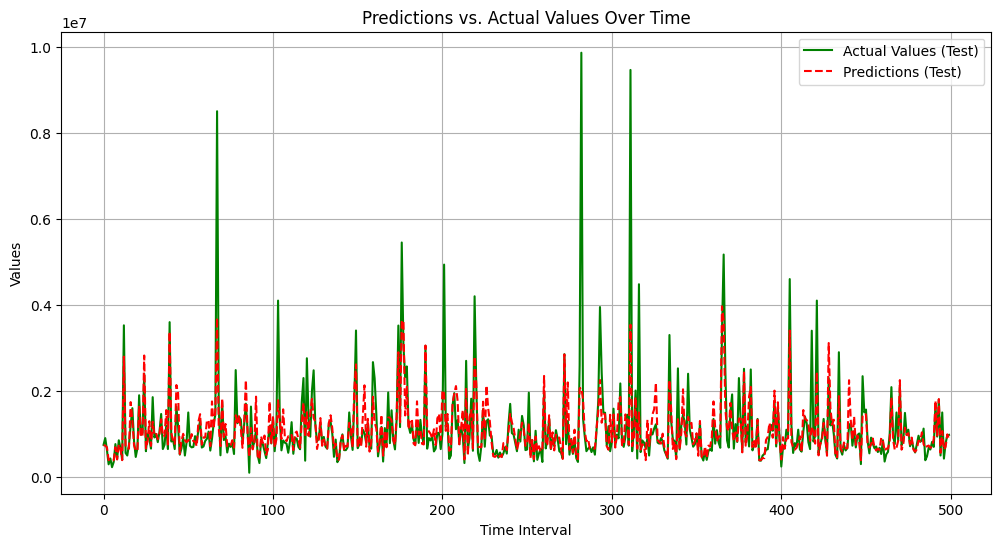

In [34]:
train_time = range(len(y_train[-500:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(500), y_test[-500:], label='Actual Values (Test)', color='green')
plt.plot(range(500), predictions[-500:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()

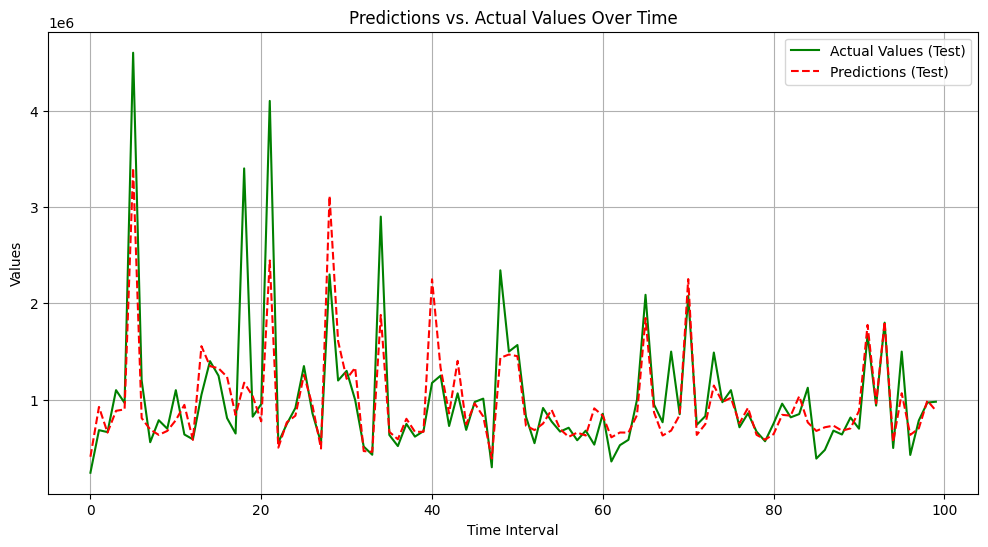

In [35]:
train_time = range(len(y_train[-100:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(100), y_test[-100:], label='Actual Values (Test)', color='green')
plt.plot(range(100), predictions[-100:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()